# Importing Data in Python (Part 1)

## Chapter 3 - Introduction to Relational Databases

### What is a Relational Database

A relational database, first described by Edgar "Ted" Codd in the late 1960s, is based on a relational model of data. A database consist of tables. In the example of Northwind Trader, you see there is an Order table, a Customer table and an Employee table. A table in relational databases represents one entity type, such as Orders. The tables looks much like a DataFrame, each row or record is an instance of the entity type and each column is an attribute of each instance. It is essential that each row contain a unique identifier known as a Primary Key. In the Orders table, the key is the Order ID, the first column. The key to relational database is that the tables are linked. You will see that the Orders table has a Customer ID and an Employee ID and the values in these columns correspond to a Primary Key of an instance in each of the respective tables. 

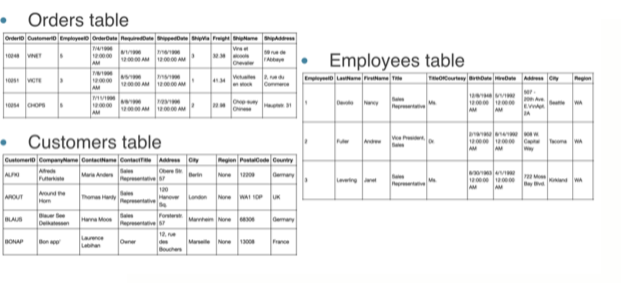

#### Relational Model
The Relational Model, as defined by Ted Codd, has been widely adopted. There is a great deal to the relational model theory, but it is summarized in Codd's 12 Commandments, which are really 13 rules, using zero-based indexing and defines what a relational database system should adhere to in order to be considered relational. 

### Creating a Database Engine in Python

There are many ways to connect to a database, but in this course we will use SQLAlchemy, as it works with many relational database management systems like PostgreSQL, mySQL and SQLite. To connect to the Northwind SQLite database, we need to import the create_engine function from the SQLAlchemy package and use that function to connect to the database. The create_engine function requires a string that first indicates the type of database you are connecting to and the name of the database. 

To query the database, we connect to the engine. First, let's explore the tables within the database using the table_names method.

In [3]:
import os
os.chdir('c:\\datacamp\\data\\')
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')
table_names = engine.table_names()
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


### Exercise 1

#### Creating a database engine
Here, you're going to fire up your very first SQL engine. You'll create an engine to connect to the SQLite database 'Chinook.sqlite', which is in your working directory. Remember that to create an engine to connect to 'Northwind.sqlite', Hugo executed the command

> engine = create_engine('sqlite:///Northwind.sqlite')

Here, 'sqlite:///Northwind.sqlite' is called the connection string to the SQLite database Northwind.sqlite. A little bit of background on the Chinook database: the Chinook database contains information about a semi-fictional digital media store in which media data is real and customer, employee and sales data has been manually created.

Why the name Chinook, you ask? According to their website,

The name of this sample database was based on the Northwind database. Chinooks are winds in the interior West of North America, where the Canadian Prairies and Great Plains meet various mountain ranges. Chinooks are most prevalent over southern Alberta in Canada. Chinook is a good name choice for a database that intends to be an alternative to Northwind.

__Instructions:__
* Import the function create_engine from the module sqlalchemy.
* Create an engine to connect to the SQLite database 'Chinook.sqlite' and assign it to engine.

In [4]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

#### What are the tables in the database?
In this exercise, you'll once again create an engine to connect to 'Chinook.sqlite'. Before you can get any data out of the database, however, you'll need to know what tables it contains!

To this end, you'll save the table names to a list using the method table_names() on the engine and then you will print the list.

__Instructions:__
* Import the function create_engine from the module sqlalchemy.
* Create an engine to connect to the SQLite database 'Chinook.sqlite' and assign it to engine.
* Using the method table_names() on the engine engine, assign the table names of 'Chinook.sqlite' to the variable table_names.
* Print the object table_names to the shell.

In [5]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


### Querying Relational Databases in Python

The Hello World of SQL queries is SELECT * FROM Table_Name, where Table_Name is the name of an actual table in the database and * indicates return all the columns and all rows in that table. The workflow for querying a SQL database includes:
- Import the packages and functions
- Create the engine
- Connect to the engine
- Query the database
- Save the results of the query to a DataFrame
- Close the connection to the database

Once you have created the database engine, you connect to the database by applying the method .connect() to the engine, assigning it a variable name, con. 

To query the database, you apply the method .execute() to the connection (con) and pass it a single argument: the relevant SQL query and this creates a SQLAlchemy Results object that we assign to a variable name, rs. 

To return the Results object into a DataFrame, we apply the method .fetchall() to rs and save it as a DataFrame, using the Pandas function DataFrame(). 

To close the connect, execute con.close - don't forget to do this!

The you can print the head of the DataFrame, but notice that the column names are not correct. 

In [16]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///Chinook.sqlite')
print(engine.table_names())

con = engine.connect()
rs = con.execute('SELECT * FROM InvoiceLine')
df = pd.DataFrame(rs.fetchall())
con.close

print(df.head())

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']
   0  1   2     3  4
0  1  1   2  0.99  1
1  2  1   4  0.99  1
2  3  2   6  0.99  1
3  4  2   8  0.99  1
4  5  2  10  0.99  1


To fix the issue with the column names, you can set the column names for the DataFrame using .columns and assign it the keys values of the Results object using .keys() method. 

In [17]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///Chinook.sqlite')
print(engine.table_names())

con = engine.connect()
rs = con.execute('SELECT * FROM Invoice')
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
con.close

print(df.head())

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']
   InvoiceId  CustomerId          InvoiceDate           BillingAddress  \
0          1           2  2007-01-01 00:00:00  Theodor-Heuss-Straße 34   
1          2           4  2007-01-02 00:00:00         Ullevålsveien 14   
2          3           8  2007-01-03 00:00:00          Grétrystraat 63   
3          4          14  2007-01-06 00:00:00           8210 111 ST NW   
4          5          23  2007-01-11 00:00:00          69 Salem Street   

  BillingCity BillingState BillingCountry BillingPostalCode  Total  
0   Stuttgart         None        Germany             70174   1.98  
1        Oslo         None         Norway              0171   3.96  
2    Brussels         None        Belgium              1000   5.94  
3    Edmonton           AB         Canada           T6G 2C7   8.91  
4      Boston           MA            USA              2113  13.86  


#### Using the Context Manager

Much like we did with opening text files, you can use the Python with Context Manager to open a connection to a database file and say you the trouble of remembering to close the connection. Also notice that we specify specific columns by naming the specific columns we want to select and that rather than selecting all the rows, we used .fetchmany() and specified that we only wanted 5 rows. 

In [18]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine('sqlite:///Chinook.sqlite')

with engine.connect() as con:
    rs = con.execute('SELECT InvoiceDate, BillingCity, BillingCountry FROM Invoice')
    df = pd.DataFrame(rs.fetchmany(size=5))
    df.columns = rs.keys()
print(df)

           InvoiceDate BillingCity BillingCountry
0  2007-01-01 00:00:00   Stuttgart        Germany
1  2007-01-02 00:00:00        Oslo         Norway
2  2007-01-03 00:00:00    Brussels        Belgium
3  2007-01-06 00:00:00    Edmonton         Canada
4  2007-01-11 00:00:00      Boston            USA


### Exercise 2

#### The Hello World of SQL Queries!
Now, it's time for liftoff! In this exercise, you'll perform the Hello World of SQL queries, SELECT, in order to retrieve all columns of the table Album in the Chinook database. Recall that the query SELECT * selects all columns.

__Instructions:__
* Open the engine connection as con using the method connect() on the engine.
* Execute the query that selects ALL columns from the Album table. Store the results in rs.
* Store all of your query results in the DataFrame df by applying the fetchall() method to the results rs.
* Close the connection!


In [19]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute('SELECT * FROM Album')

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())
con.close()
# Close connection


# Print head of DataFrame df
print(df.head())

   0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3


#### Customizing the Hello World of SQL Queries
Congratulations on executing your first SQL query! Now you're going to figure out how to customize your query in order to:

> Select specified columns from a table;<br>
> Select a specified number of rows;<br>
> Import column names from the database table.<br>

Recall that Hugo performed a very similar query customization in the video:

> engine = create_engine('sqlite:///Northwind.sqlite')

> with engine.connect() as con:<br>
>> rs = con.execute("SELECT OrderID, OrderDate, ShipName FROM Orders")<br>
>> df = pd.DataFrame(rs.fetchmany(size=5))<br>
>> df.columns = rs.keys()<br>

Packages have already been imported as follows:
> from sqlalchemy import create_engine
> import pandas as pd

The engine has also already been created:
>engine = create_engine('sqlite:///Chinook.sqlite')

The engine connection is already open with the statement
> with engine.connect() as con:

All the code you need to complete is within this context.

__Instructions:__
* Execute the SQL query that selects the columns LastName and Title from the Employee table. Store the results in the variable rs.
* Apply the method fetchmany() to rs in order to retrieve 3 of the records. Store them in the DataFrame df.
* Using the rs object, set the DataFrame's column names to the corresponding names of the table columns.

In [21]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


#### Filtering your database records using SQL's WHERE
You can now execute a basic SQL query to select records from any table in your database and you can also perform simple query customizations to select particular columns and numbers of rows.

There are a couple more standard SQL query chops that will aid you in your journey to becoming an SQL ninja.

Let's say, for example that you wanted to get all records from the Customer table of the Chinook database for which the Country is 'Canada'. You can do this very easily in SQL using a SELECT statement followed by a WHERE clause as follows:
> SELECT * FROM Customer WHERE Country = 'Canada'

In fact, you can filter any SELECT statement by any condition using a WHERE clause. This is called filtering your records.

In this interactive exercise, you'll select all records of the Employee table for which 'EmployeeId' is greater than or equal to 6.

Packages are already imported as follows:
> import pandas as pd<br>
> from sqlalchemy import create_engine<br>

Query away!

__Instructions:__
* Complete the argument of create_engine() so that the engine for the SQLite database 'Chinook.sqlite' is created.
* Execute the query that selects all records from the Employee table where 'EmployeeId' is greater than or equal to 6. Use the >= operator and assign the results to rs.
* Apply the method fetchall() to rs in order to fetch all records in rs. Store them in the DataFrame df.
* Using the rs object, set the DataFrame's column names to the corresponding names of the table columns.

In [22]:
import pandas as pd
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Employee WHERE EmployeeID >= 6')
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   

              HireDate                      Address        City State Country  \
0  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  


#### Ordering your SQL records with ORDER BY
You can also order your SQL query results. For example, if you wanted to get all records from the Customer table of the Chinook database and order them in increasing order by the column SupportRepId, you could do so with the following query:

>"SELECT * FROM Customer ORDER BY SupportRepId"<br>

In fact, you can order any SELECT statement by any column.

In this interactive exercise, you'll select all records of the Employee table and order them in increasing order by the column BirthDate.

Packages are already imported as follows:
> import pandas as pd<br>
> from sqlalchemy import create_engine<br>

Get querying!

__Instructions:__
* Using the function create_engine(), create an engine for the SQLite database Chinook.sqlite and assign it to the variable engine.
* In the context manager, execute the query that selects all records from the Employee table and orders them in increasing order by the column BirthDate. Assign the result to rs.
* In a call to pd.DataFrame(), apply the method fetchall() to rs in order to fetch all records in rs. Store them in the DataFrame df.
* Set the DataFrame's column na

In [23]:
import pandas as pd
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Employee ORDER BY BirthDate')
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName FirstName                Title  ReportsTo  \
0           4      Park  Margaret  Sales Support Agent        2.0   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           1     Adams    Andrew      General Manager        NaN   
3           5   Johnson     Steve  Sales Support Agent        2.0   
4           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate              Address        City  \
0  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW     Calgary   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW     Calgary   
2  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW    Edmonton   
3  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave     Calgary   
4  1968-01-09 00:00:00  2004-03-04 00:00:00          923 7 ST NW  Lethbridge   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T2P 5G3  +1 (403)

### Querying Relational Databases Directly with Pandas

Using Pandas read_sql_query() function, you can simplify the 4 lines of code that we had been using to one. 

In [26]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine('sqlite:///Chinook.sqlite')
df = pd.read_sql_query("SELECT * from Employee", engine)

### Exercise 3

#### Pandas and The Hello World of SQL Queries!
Here, you'll take advantage of the power of pandas to write the results of your SQL query to a DataFrame in one swift line of Python code!

You'll first import pandas and create the SQLite 'Chinook.sqlite' engine. Then you'll query the database to select all records from the Album table.

Recall that to select all records from the Orders table in the Northwind database, Hugo executed the following command:

> df = pd.read_sql_query("SELECT * FROM Orders", engine)

__Instructions:__
* Import the pandas package using the alias pd.
* Using the function create_engine(), create an engine for the SQLite database Chinook.sqlite and assign it to the variable engine.
* Use the pandas function read_sql_query() to assign to the variable df the DataFrame of results from the following query: select all records from the table Album.
* The remainder of the code is included to confirm that the DataFrame created by this method is equal to that created by the previous method that you learned.

In [27]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine('sqlite:///Chinook.sqlite')
df = pd.read_sql_query("SELECT * from Album", engine)
print(df.head())

#Open engine context manager and store query results as df1
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Album')
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

#Confirm both methods yield the same results
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True


#### Pandas for more complex querying
Here, you'll become more familiar with the pandas function read_sql_query() by using it to execute a more complex query: a SELECT statement followed by both a WHERE clause AND an ORDER BY clause.

You'll build a DataFrame that contains the rows of the Employee table for which the EmployeeId is greater than or equal to 6 and you'll order these entries by BirthDate.

__Instructions:__
* Using the function create_engine(), create an engine for the SQLite database Chinook.sqlite and assign it to the variable engine.
* Use the pandas function read_sql_query() to assign to the variable df the DataFrame of results from the following query: select all records from the Employee table where the EmployeeId is greater than or equal to 6 and ordered by BirthDate (make sure to use WHERE and ORDER BY in this precise order).

In [28]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Employee WHERE EmployeeID >= 6 ORDER BY BirthDate", engine)

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   

              HireDate                      Address        City State Country  \
0  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  


#### Advanced Querying: Exploiting Table Relationships

Since the real power of relational databases is the relationship between multiple tables, it is common to query multiple tables for specific information from each table(s). In the Northwinds database, in order to get the Order ID and the Company Name of the ordering Customer, you use the JOIN query term. In this case, the join is an inner join. 

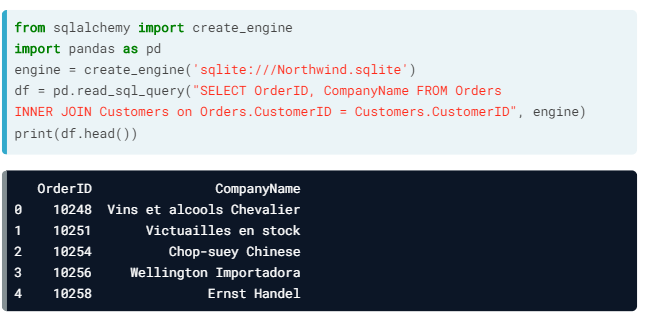

### Exercise 4

#### The power of SQL lies in relationships between tables: INNER JOIN
Here, you'll perform your first INNER JOIN! You'll be working with your favourite SQLite database, Chinook.sqlite. For each record in the Album table, you'll extract the Title along with the Name of the Artist. The latter will come from the Artist table and so you will need to INNER JOIN these two tables on the ArtistID column of both.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, Hugo executed the following SQL query:
> SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID,br>

The following code has already been executed to import the necessary packages and to create the engine:
> import pandas as pd<br>
> from sqlalchemy import create_engine<br>
> engine = create_engine('sqlite:///Chinook.sqlite')<br>

__Instructions:__
* Assign to rs the results from the following query: select all the records, extracting the Title of the record and Name of the artist of each record from the Album table and the Artist table, respectively. To do so, INNER JOIN these two tables on the ArtistID column of both.
* In a call to pd.DataFrame(), apply the method fetchall() to rs in order to fetch all records in rs. Store them in the DataFrame df.
* Set the DataFrame's column names to the corresponding names of the table columns.

In [29]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///c:\\datacamp\\data\\Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID')
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


#### Filtering your INNER JOIN
Congrats on performing your first INNER JOIN! You're now going to finish this chapter with one final exercise in which you perform an INNER JOIN and filter the result using a WHERE clause.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, Hugo executed the following SQL query:
>SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID<br>

The following code has already been executed to import the necessary packages and to create the engine:
> import pandas as pd<br>
> from sqlalchemy import create_engine<br>
> engine = create_engine('sqlite:///Chinook.sqlite')<br>

__Instructions:__
* Use the pandas function read_sql_query() to assign to the variable df the DataFrame of results from the following query: select all records from
>PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId<br>

that satisfy the condition Milliseconds < 250000.

In [31]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000', engine)

# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId              Name  AlbumId  MediaTypeId  \
0           1     3390     3390  One and the Same      271            2   
1           1     3392     3392     Until We Fall      271            2   
2           1     3393     3393     Original Fire      271            2   
3           1     3394     3394       Broken City      271            2   
4           1     3395     3395          Somedays      271            2   

   GenreId Composer  Milliseconds    Bytes  UnitPrice  
0       23     None        217732  3559040       0.99  
1       23     None        230758  3766605       0.99  
2       23     None        218916  3577821       0.99  
3       23     None        228366  3728955       0.99  
4       23     None        213831  3497176       0.99  
